# Sampling, randomness and Monte Carlo
'I’m a great believer in luck, and I find the harder I work the more I have of it.' <i> Thomas Jefferson.</i>

<div id="picture">
<figure>
		<img width="400" align="middle" src="../data/xkcd.png">
        <figcaption>  BOOM </figcaption>
</figure>
</div>

## Random numbers aka let's gamble our way to the answer
We want to calculate the value of $\pi$. Let's define a quadrant (the positive numbers for now). Given that the equation for this circle is $$ x^2 + y^2 = 1 \ x, y > 0$$

how might we calculate the value of $\pi$ numerically?
## Walking in randomness:

We've discussed distributions and probabilities, but it is worth talking about randomness, as this will be key to our numerical probing of the space.
Let's start by talking a random walk. 


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import NullFormatter

In [3]:
## Generate some random numbers, num of them
num = 5000
## choose a uniform random distribution
vec = np.random.rand(num)
## histogram the random numbers to see the distribution
#plt.hist(vec, 20)
#plt.show()

We can use these random numbers to define a random walk. Here rather than having the path be independent, we build on previous steps and so construct a walk.


5000 70.7106781187 47.7149787803


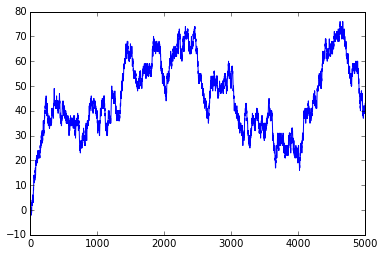

In [4]:
stepsize=1
steps = np.zeros(num) ##initialise the step vector 
diffs = np.zeros(num) ##initialise the step vector 

for i in range(1,num):
    diffs[i] = -1+2*np.round(vec[i])
    steps[i] = steps[i-1]+diffs[i]

##print -1+2*np.round(vec)
##print steps
plt.plot(steps)
print num, np.sqrt(stepsize*num), np.sqrt(np.average(steps**2))

## Generating random distributions with acceptance/rejection

We had a nice introduction in the first session to various distributions, and even saw that we could draw/sample from those distributions. But what about that moment when numpy fails and you want to draw random numbers from a specific distribution?

<div id="picture">
<figure>
		<img width="400" align="middle" src="../data/Rejection.png">
        <figcaption>  Basic rejection method</figcaption>
</figure>
</div>

Well, turns out we can turn uniform random numbers into numbers drawn from any distribution we like, using an acceptance/rejection procedure.

we are using prob_func in the implementation


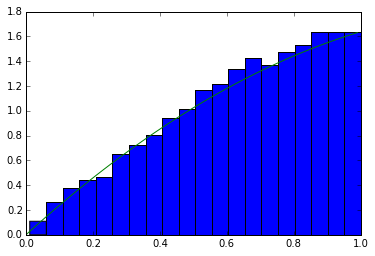

In [5]:
## define the functional form that we want to emulate - let's draw numbers that follow a functional form p = a*x^2+b*x

def prob_func(randval):
    a = -0.5  ## should be in [-1,1] or else there are issues                                           
    b = 1-a                                                                                       
    f = a*randval**2+b*randval
    return f

def throw_rand(num, func_name):
    ## generate the first pair of random numbers
    print 'we are using %s in the implementation' %func_name
    finalp = np.zeros(num)
    for i in range(num):
        randpair = np.random.rand(2) ##generate a pair of numbers
        ptemp = prob_func(randpair[0])
        while (randpair[1] >=  ptemp): 
            ## keep throwing random numbers until the one you throw lies below the distribution you want            
            randpair = np.random.rand(2)                                                                           
            ptemp = globals()[func_name](randpair[0])  ##prob_func(randpair[0])
        finalp[i] = randpair[0] ## once this is satisfied, take the probability                                            
    return finalp

rands = throw_rand(num, 'prob_func') 
plotvec = np.arange(0,1,0.01)
output=plt.hist(rands, normed=1, bins=20)
#print np.max(output[0])
plt.plot(plotvec,np.max(output[0])*(-0.5*plotvec**2+1.5*plotvec))

## Bayes theorem 
Above we show that you can do a lot with random numbers through coming up with a criterion for accepting and rejecting the numbers - i.e. for building up a chain/walk of those numbers.

Yesterday we were introduced to Bayes theorem. Let's recap where this comes from and how we can use it.

We start again with the definition of the $\textbf{conditional}$ probability, the probability of x $\textit{given}$ y:
$p(x|y).$

We also remember the $\textbf{joint}$ probability, the probability of x $\textit{and}$ y: $p(x,y)$.
If x and y are indendent, then 

$$ p(x,y) = p(x)p(y) $$ but then also if they are independent

$$ p(x|y) = p(x)$$ 
(if they are truly independent then the probablilty of x happening doesn't at all depend on y happening.

So $$ p(x|y) = \frac{p(x,y)}{p(y)}.$$

Also by summetry $$p(y|x) = \frac{p(y,x)}{p(x)} $$

Now there is nothing special about order in the joint distribution, i.e $$ p(x,y) = p(y,x)$$.

so we have that $$ \frac{p(x|y)}{p(y|x)} = \frac{p(x)}{p(y)} $$

and there we have Bayes theorem -- let's write it with only one term on the left hand side:

$$ p(x|y)= \frac{p(y|x)p(x)}{p(y)} $$

We use Bayes theorem to write the posterior probability of the model given the data (i.e. what we want to know), or $p(d|\theta),$ in terms of things we understand and can compute (i.e. the likelihood of the data given the model) and our prior knowledge of the likelihhod of the model in the first place, or $p(\theta)$.

So

$$ p(\theta|d)= \frac{p(d|\theta)p(\theta)}{p(d)} $$

The final term in the denominator is what we call the evidence, which is how likely is the data anyway. In general we will not use this term directly unless we are comparing different models to each other, so this becomes a normalisation (i.e. doesn't change from place to place in the model parameter space), so we use something often more like $$ p(\theta|d)\propto p(d|\theta)p(\theta) $$


### Priors, priors, priors
The biggest different that cannot be stressed enough between this type of work and the grid based approach we did yesterday is the importance of the prior, $p(\theta)$ as we need to know it to compute the produce $p(d|\theta)p(\theta)$ and it will have the ability to change our answers - so STATE YOUR PRIORS. Let's take a look at the following example of priors and how they can affect the final posterior.

In [11]:
num=500
randvec = np.random.rand(num) # the random numbers that will make our prior


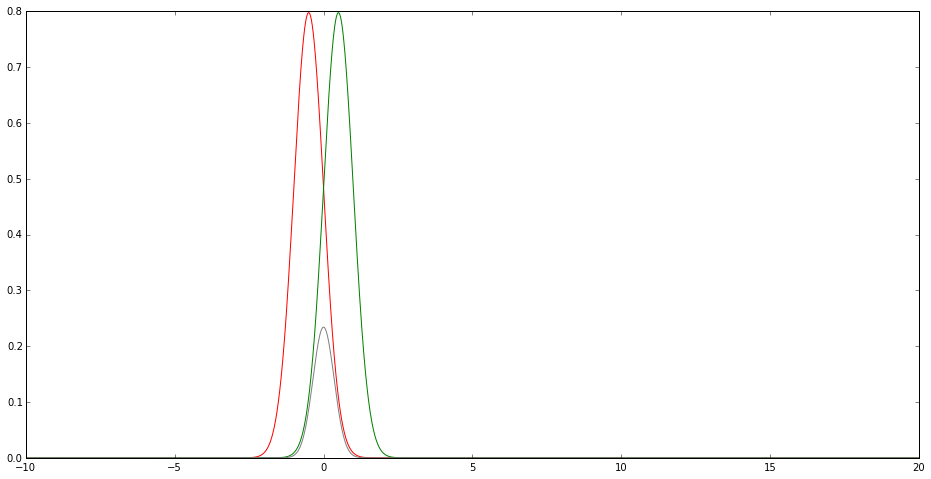

In [28]:
from scipy.stats import norm

priormean, priorsig = -0.5, 0.5
likmean, liksig = 0.5, 0.5
x = np.linspace(-10,20, num=2000)
prior = norm.pdf(x, priormean, priorsig)
likelihood = norm.pdf(x, likmean,liksig)

posterior = prior*likelihood

plt.figure(1,figsize=(16,8))
##plotting the prior
plt.plot(x,prior, color='red')
#plotting the likelihood
plt.plot(x,likelihood, color='green')
#plotting the posterior
plt.plot(x,posterior, color='gray')


## Stepping in the parameter space

So now that we have a Bayesian likelihood, how do we go about stepping in parameter space - or sampling the likelihood.
We have the grid analogy from yesterday - we wanted to maxmise the likelihood (and so minimise the $\chi^2$) and we worked on a grid, moving in parameter space and computing the likelihood at each point. This gave us a 'carpet' of $\chi^2$ values and we could find the parameter pair that gave us the minimum value.

But this led us to re-iterate a few times, in places we had 'missed' the minimum point. How can we do better?

What we find is using Bayes approach, and a random (rather than deterministic) sampling will allow us to sample the space efficiently!

We will start with a parameter vector $\theta$ that encodes our theoretical model as before. A key additional part os that we need to define a vector of step sizes, since we are going to be jumping around in the parameter space. We'll need one step size per parameter. Let's call this vector of steps $\sigma_\theta$ 

The key to this is in the way we sample. There are many different ways to do this, but we'll start with the simplest approach, the Metropolis Hastings method.


## Markov Chain Monte Carlo and the Metroplis Hastings Method

* Define a starting point for the parameter vector $\theta_0$.
* Compute the likelihood of the data given this model/parameter vector, or $p(d|\theta_0)$.
* Compute the prior of this parameter vector $p(\theta_0)$.
* Multiply them together to get something proportional to the posterior $p(\theta_0|d) \propto p(d|\theta_0)p(\theta_0)$.
* Take a RANDOM JUMP in parameter space: $\delta \theta = N(0,1)\sigma_\theta$
* Define the new step as $\theta_1 = \theta_0 + \delta\theta $
* Compute the posterior of the new step, from the likelihood and the prior as above
* Compute the ratio of posteriors $$ \frac{p(d|\theta_1)p(\theta_1)}{p(d|\theta_0)p(\theta_0)}$$
* Now if this ratio is larger than one, the new point is better - so we definitely want to accept the point!
* If it isn't larger than one, we throw a random number and only ask that the point is larger than that random number.
* This makes all the difference!

* If you accept a new point $\theta_1$ write it down and jump again.
* If you don't accept the new point - set $\theta_1 = \theta_0$ and jump again. Remember to record that you stayed in the same place!


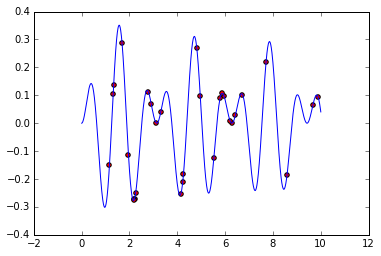

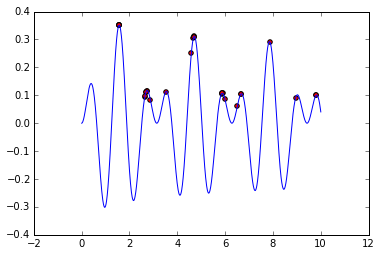

In [65]:
# can we write some simple code
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def model(x):
    return np.sin(x) * np.e**(-x**0.1) * np.sin(5.*x)
x = np.linspace(0., 10., 1000)
y = model(x)

def points_sum(y):
    return np.sum(y)

x_start = []
for i in range(30):
    x_start.append(10 * np.random.random())

x_start = np.array(x_start)
y_start = model(x_start)

plt.scatter(x_start, y_start, c='r')
plt.plot(x, y)
plt.show()

x_pre = x_start
for i in range(10000):
    x_next = x_pre + np.array( [0.001 * (2. *np.random.random()-1.) for j in range(len(x_pre))] )
    y_next = model(x_next)
    if (points_sum(y_next) > points_sum(model(x_pre))):
        x_pre = x_next
    else:
        p = np.random.random()
        if p > 0.8:
            x_pre = x_next
        else:
            pass
plt.scatter(x_pre, model(x_pre), c='r')
plt.plot(x,y)
plt.show()